fixing the hsv boundaries so we can more reliably extract the blue grid

method:
- tighten the min/max boundaries
- review 200 images in stills-thu (removed all night images)
- write down incorrect images, see cell 'bad images' below
- display bad images, with 'digital color meter' find rgb value of grid that doesn't get included
- add rgb to threshold hsv values and recompute to hsv
- tweak min/max so that all hsv found in bad images fit in. 

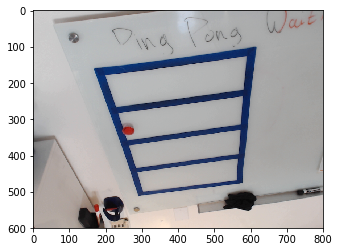

In [2]:
import cv2
cv2.__version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("../reference/frame12.png")
image = img
# test plotting
def imshow(img):  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
imshow(img)

In [ ]:
# threshold HSV image
# valid blue values measured of an image (use Digital Color Meter)
# this array is based on some reference images and points from the bad images (list below)
valid = np.array([15,37,82, 18,50,104, 11,33,74, 21,31,63, 16,40,91, 15,42,92, 11,45,102, 16,32,73, 
                  16,26,42, 13,30,59, 48,71,112, 17,54,110, 61,75,116, 62,74,111, 
                 14,53,118, 13,54,119, 51,54,87, 54,56,87], dtype=np.uint8)
valid = valid.reshape([-1, 2, 3])
cv2.cvtColor(valid, cv2.COLOR_RGB2HSV)


In [3]:
def tightbluemask(image, clean=True):
    """Returns a mask (grayscale image) which is >0 in the area of the blue grid."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    threshold  = np.array([[103,95,30],[120,240,125]])
    mask = cv2.inRange(hsv, threshold[0,:], threshold[1,:])

    if clean:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask


# plt.imshow(tightbluemask(image))

In [10]:
# create nice images for all files in stills-thu , resulting images are placed in: stills-test
import glob, sys, time, os
os.system("rm ../stills-test/*.png")
for fn in glob.glob("../stills-thu/frame*png"): 
    newname = fn.replace(".png", ".x.png").replace("stills-thu", "stills-test")
    print(newname)
    img = cv2.imread(fn)
    conv = tightbluemask(img)
    conv3 = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB) # 182,177,240
    #supr = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
    supr = img.copy()
    supr[conv>0,:] = (182,177,240) 
    both = np.concatenate([supr,conv3], axis=1)
    cv2.imwrite(newname, both)
    
# open the stills test in an images viewer or macos finder in "columns" mode.

    

../stills-test/frame18339.x.png
../stills-test/frame18340.x.png
../stills-test/frame18341.x.png
../stills-test/frame18342.x.png
../stills-test/frame18343.x.png
../stills-test/frame18344.x.png
../stills-test/frame18345.x.png
../stills-test/frame18346.x.png
../stills-test/frame18347.x.png
../stills-test/frame18348.x.png
../stills-test/frame18349.x.png
../stills-test/frame18350.x.png
../stills-test/frame18351.x.png
../stills-test/frame18352.x.png
../stills-test/frame18353.x.png
../stills-test/frame18354.x.png
../stills-test/frame18355.x.png
../stills-test/frame18356.x.png
../stills-test/frame18357.x.png
../stills-test/frame18358.x.png
../stills-test/frame18359.x.png
../stills-test/frame18360.x.png
../stills-test/frame18361.x.png
../stills-test/frame18362.x.png
../stills-test/frame18363.x.png
../stills-test/frame18364.x.png
../stills-test/frame18365.x.png
../stills-test/frame18366.x.png
../stills-test/frame18367.x.png
../stills-test/frame18368.x.png
../stills-test/frame18369.x.png
../still

../stills-test/frame18597.x.png
../stills-test/frame18598.x.png
../stills-test/frame18599.x.png
../stills-test/frame18600.x.png
../stills-test/frame18601.x.png
../stills-test/frame18602.x.png
../stills-test/frame18603.x.png
../stills-test/frame18604.x.png
../stills-test/frame18605.x.png
../stills-test/frame18606.x.png
../stills-test/frame18607.x.png
../stills-test/frame18608.x.png
../stills-test/frame18609.x.png
../stills-test/frame18610.x.png
../stills-test/frame18611.x.png
../stills-test/frame18612.x.png
../stills-test/frame18613.x.png
../stills-test/frame18614.x.png
../stills-test/frame18615.x.png
../stills-test/frame18616.x.png
../stills-test/frame18617.x.png
../stills-test/frame18618.x.png
../stills-test/frame18619.x.png
../stills-test/frame18620.x.png
../stills-test/frame18621.x.png
../stills-test/frame18622.x.png
../stills-test/frame18623.x.png
../stills-test/frame18624.x.png
../stills-test/frame18625.x.png
../stills-test/frame18626.x.png
../stills-test/frame18627.x.png
../still

../stills-test/frame18854.x.png
../stills-test/frame18855.x.png
../stills-test/frame18856.x.png
../stills-test/frame18857.x.png
../stills-test/frame18858.x.png
../stills-test/frame18859.x.png
../stills-test/frame18860.x.png
../stills-test/frame18861.x.png
../stills-test/frame18862.x.png
../stills-test/frame18863.x.png
../stills-test/frame18864.x.png
../stills-test/frame18865.x.png
../stills-test/frame18866.x.png
../stills-test/frame18867.x.png
../stills-test/frame18868.x.png
../stills-test/frame18869.x.png
../stills-test/frame18870.x.png
../stills-test/frame18871.x.png
../stills-test/frame18872.x.png
../stills-test/frame18873.x.png
../stills-test/frame18874.x.png
../stills-test/frame18875.x.png
../stills-test/frame18876.x.png
../stills-test/frame18877.x.png
../stills-test/frame18878.x.png
../stills-test/frame18879.x.png
../stills-test/frame18880.x.png
../stills-test/frame18881.x.png
../stills-test/frame18882.x.png
../stills-test/frame18883.x.png
../stills-test/frame18884.x.png
../still

../stills-test/frame19112.x.png
../stills-test/frame19113.x.png
../stills-test/frame19114.x.png
../stills-test/frame19115.x.png
../stills-test/frame19116.x.png
../stills-test/frame19117.x.png
../stills-test/frame19118.x.png
../stills-test/frame19119.x.png
../stills-test/frame19120.x.png
../stills-test/frame19121.x.png
../stills-test/frame19122.x.png
../stills-test/frame19123.x.png
../stills-test/frame19124.x.png
../stills-test/frame19125.x.png
../stills-test/frame19126.x.png
../stills-test/frame19127.x.png
../stills-test/frame19128.x.png
../stills-test/frame19129.x.png
../stills-test/frame19130.x.png
../stills-test/frame19131.x.png
../stills-test/frame19132.x.png
../stills-test/frame19133.x.png
../stills-test/frame19134.x.png
../stills-test/frame19135.x.png
../stills-test/frame19136.x.png
../stills-test/frame19137.x.png
../stills-test/frame19138.x.png
../stills-test/frame19139.x.png
../stills-test/frame19140.x.png
../stills-test/frame19141.x.png
../stills-test/frame19142.x.png
../still

../stills-test/frame19370.x.png
../stills-test/frame19371.x.png
../stills-test/frame19372.x.png
../stills-test/frame19373.x.png
../stills-test/frame19374.x.png
../stills-test/frame19375.x.png
../stills-test/frame19376.x.png
../stills-test/frame19377.x.png
../stills-test/frame19378.x.png
../stills-test/frame19379.x.png
../stills-test/frame19380.x.png
../stills-test/frame19381.x.png
../stills-test/frame19382.x.png
../stills-test/frame19383.x.png
../stills-test/frame19384.x.png
../stills-test/frame19385.x.png
../stills-test/frame19386.x.png
../stills-test/frame19387.x.png
../stills-test/frame19388.x.png
../stills-test/frame19389.x.png
../stills-test/frame19390.x.png
../stills-test/frame19391.x.png
../stills-test/frame19392.x.png
../stills-test/frame19393.x.png
../stills-test/frame19394.x.png
../stills-test/frame19395.x.png
../stills-test/frame19396.x.png
../stills-test/frame19397.x.png
../stills-test/frame19398.x.png
../stills-test/frame19399.x.png
../stills-test/frame19400.x.png
../still

In [ ]:
# bad images
bad = "stills-thu/frame1057.png stills-thu/frame107.png stills-thu/frame120.png stills-thu/frame17.png stills-thu/frame72.png".split()
fn = bad[4]
print(fn)
img = cv2.imread(fn)
imshow(img)

    

In [ ]:
imshow(img)
conv = tightbluemask(img)
conv = cv2.cvtColor(conv, cv2.COLOR_GRAY2RGB)
#conv = cv2.bitwise_and(img,img, mask=cv2.bitwise_not(conv))
conv = np.concatenate([img,conv], axis=1)
plt.imshow(conv)

In [ ]:
conv = conv[:,:,np.newaxis]
layer0 = np.zeros_like(conv)
conv = np.append(conv, layer0, axis=2)
conv = np.append(conv, layer0, axis=2)
conv.shape